In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import re

In [4]:
#read data as a csv file
#maybe want to split data according to language,genre
mov_train=pd.read_csv("./DataSets/train.csv")
mov_train.head()    

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [6]:
max_pop=mov_train['popularity'].max()

In [7]:
mov_train[mov_train.popularity==max_pop]

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
518,519,"[{'id': 468552, 'name': 'Wonder Woman Collecti...",149000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.warnerbros.com/wonder-woman,tt0451279,en,Wonder Woman,An Amazon princess comes to the world of Man t...,294.337037,...,5/30/17,141.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...",Released,Power. Grace. Wisdom. Wonder.,Wonder Woman,"[{'id': 849, 'name': 'dc comics'}, {'id': 1701...",NaN,NaN,820580447


In [11]:
mov_train.iloc[518]['spoken_languages']

"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso_639_1': 'en', 'name': 'English'}]"

In [12]:
min_pop=mov_train['popularity'].min()
mov_train.iloc[mov_train[mov_train.popularity==min_pop]['id']-1]

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
2556,2557,NaN,0,"[{'id': 99, 'name': 'Documentary'}, {'id': 18,...",NaN,tt0094743,en,Big Time,Bringing his unique sense of humor to this biz...,0.000001,...,9/15/88,87.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"The concert was ""the best live performance of ...",Big Time,"[{'id': 10183, 'name': 'independent film'}]","[{'cast_id': 1, 'character': '', 'credit_id': ...","[{'credit_id': '5654795892514170210042e6', 'de...",148426


In [13]:
mov_train['imdb_rating']=0

In [14]:
mov_train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,imdb_rating
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,0
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,0
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,0
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,0
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,0


In [15]:
imdb_data=pd.read_csv("./DataSets/title.ratings.tsv",sep='\t')

In [16]:
imdb_data.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1924
1,tt0000002,5.8,259
2,tt0000003,6.5,1737
3,tt0000004,5.6,174
4,tt0000005,6.2,2550


In [66]:
for j in mov_train.index:
    if not (imdb_data[imdb_data.tconst==mov_train.loc[j,'imdb_id']]['averageRating'].empty):
        mov_train.loc[j,'imdb_rating']=imdb_data[imdb_data.tconst==mov_train.loc[j,'imdb_id']]['averageRating'].iloc[0]
    else:
        mov_train.loc[j,'imdb_rating']=math.nan

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900


In [68]:
len(mov_train)

3000

In [69]:
mov_test=pd.read_csv("./DataSets/test.csv")
mov_test.head()    

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


In [70]:
len(mov_test)

4398

In [71]:
with open('mov_train.csv','w') as file:
    mov_train.to_csv(file)

In [72]:
mov_test['imdb_rating']=0

In [73]:
mov_test['numVotes']=0

In [74]:
for j in mov_test.index:
    if not (imdb_data[imdb_data.tconst==mov_test.loc[j,'imdb_id']]['averageRating'].empty):
        mov_test.loc[j,'imdb_rating']=imdb_data[imdb_data.tconst==mov_test.loc[j,'imdb_id']]['averageRating'].iloc[0]
        mov_test.loc[j,'numVotes']=imdb_data[imdb_data.tconst==mov_test.loc[j,'imdb_id']]['numVotes'].iloc[0]
    else:
        mov_test.loc[j,'imdb_rating']=math.nan
        mov_test.loc[j,'numVotes']=math.nan
    if(j%100==0):
        print(j)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300


In [75]:
with open('mov_test.csv','w') as file:
    mov_test.to_csv(file)

In [76]:
mov_train['numVotes']=0
for j in mov_train.index:
    x=imdb_data[imdb_data.tconst==mov_train.loc[j,'imdb_id']]
    if not (x.empty):
        mov_train.loc[j,'numVotes']=x['numVotes'].iloc[0]
    else:
        mov_train.loc[j,'numVotes']=math.nan
    if(j%100==0):
        print(j)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900


In [77]:
with open('mov_train.csv','w') as file:
    mov_train.to_csv(file)

In [78]:
mov_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [80]:
max(mov_train['popularity'].max(),mov_test['popularity'].max())

547.488298

In [81]:
mov_test[mov_test.popularity==max_pop]

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,imdb_rating,numVotes
3380,6381,"[{'id': 86066, 'name': 'Despicable Me Collecti...",74000000,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",http://www.minionsmovie.com/,tt2293640,en,Minions,"Minions Stuart, Kevin and Bob are recruited by...",547.488298,...,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Before Gru, they had a history of bad bosses",Minions,"[{'id': 3487, 'name': 'assistant'}, {'id': 179...","[{'cast_id': 22, 'character': 'Scarlet Overkil...","[{'credit_id': '5431b2b10e0a2656e20026c7', 'de...",6.4,240032.0


In [83]:
mov_train.genres

0                          [{'id': 35, 'name': 'Comedy'}]
1       [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
2                           [{'id': 18, 'name': 'Drama'}]
3       [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...
4       [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...
                              ...                        
2995    [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...
2996    [{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...
2997    [{'id': 80, 'name': 'Crime'}, {'id': 28, 'name...
2998    [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...
2999    [{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...
Name: genres, Length: 3000, dtype: object

In [121]:
genres=set()
for item in mov_train.genres:
    if(type(item)==str):
        x=re.finditer("(\'name\':\s\')(?P<name>\w*)(?=\')",item)
        for s in x:
            genres.add(s.groupdict()['name'])
print(genres)

{'History', 'Comedy', 'War', 'Drama', 'Documentary', 'Mystery', 'Adventure', 'Fantasy', 'Western', 'Foreign', 'Music', 'Thriller', 'Family', 'Crime', 'Horror', 'Action', 'Romance', 'Animation'}


array([[<AxesSubplot: xlabel='budget', ylabel='budget'>,
        <AxesSubplot: xlabel='popularity', ylabel='budget'>,
        <AxesSubplot: xlabel='runtime', ylabel='budget'>,
        <AxesSubplot: xlabel='imdb_rating', ylabel='budget'>,
        <AxesSubplot: xlabel='revenue', ylabel='budget'>],
       [<AxesSubplot: xlabel='budget', ylabel='popularity'>,
        <AxesSubplot: xlabel='popularity', ylabel='popularity'>,
        <AxesSubplot: xlabel='runtime', ylabel='popularity'>,
        <AxesSubplot: xlabel='imdb_rating', ylabel='popularity'>,
        <AxesSubplot: xlabel='revenue', ylabel='popularity'>],
       [<AxesSubplot: xlabel='budget', ylabel='runtime'>,
        <AxesSubplot: xlabel='popularity', ylabel='runtime'>,
        <AxesSubplot: xlabel='runtime', ylabel='runtime'>,
        <AxesSubplot: xlabel='imdb_rating', ylabel='runtime'>,
        <AxesSubplot: xlabel='revenue', ylabel='runtime'>],
       [<AxesSubplot: xlabel='budget', ylabel='imdb_rating'>,
        <AxesSubplot: 

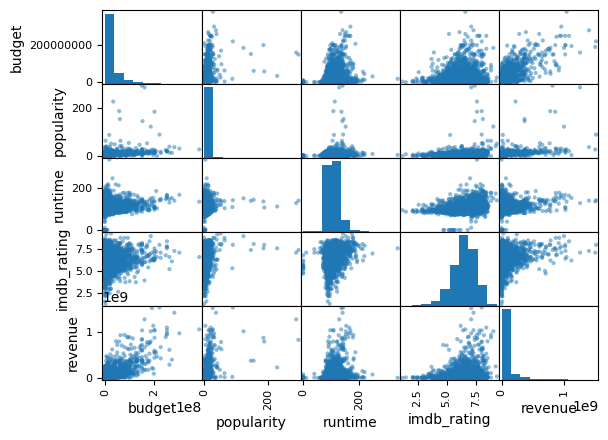

In [104]:
pd.plotting.scatter_matrix(mov_train[['budget','popularity','runtime','imdb_rating','revenue']])

In [105]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler=StandardScaler()
scaler.fit(mov_train[['budget','popularity','runtime','imdb_rating','revenue']])
mov_train[['budget','popularity','runtime','imdb_rating','revenue']]=scaler.transform(mov_train[['budget','popularity','runtime','imdb_rating','revenue']])

In [106]:
mov_train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,imdb_rating,numVotes
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",-0.230453,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",-0.155998,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",-0.395691,-1.445967,39572.0
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",0.471872,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,-0.017714,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",0.206703,-0.648724,82272.0
2,3,NaN,-0.519486,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",4.613849,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",-0.390038,2.041971,852772.0
3,4,NaN,-0.576212,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,-0.436981,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",-0.368890,1.643349,63220.0
4,5,NaN,-0.608627,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,-0.604463,...,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",-0.456710,-0.748379,316.0


array([[<AxesSubplot: xlabel='budget', ylabel='budget'>,
        <AxesSubplot: xlabel='popularity', ylabel='budget'>,
        <AxesSubplot: xlabel='runtime', ylabel='budget'>,
        <AxesSubplot: xlabel='imdb_rating', ylabel='budget'>,
        <AxesSubplot: xlabel='revenue', ylabel='budget'>],
       [<AxesSubplot: xlabel='budget', ylabel='popularity'>,
        <AxesSubplot: xlabel='popularity', ylabel='popularity'>,
        <AxesSubplot: xlabel='runtime', ylabel='popularity'>,
        <AxesSubplot: xlabel='imdb_rating', ylabel='popularity'>,
        <AxesSubplot: xlabel='revenue', ylabel='popularity'>],
       [<AxesSubplot: xlabel='budget', ylabel='runtime'>,
        <AxesSubplot: xlabel='popularity', ylabel='runtime'>,
        <AxesSubplot: xlabel='runtime', ylabel='runtime'>,
        <AxesSubplot: xlabel='imdb_rating', ylabel='runtime'>,
        <AxesSubplot: xlabel='revenue', ylabel='runtime'>],
       [<AxesSubplot: xlabel='budget', ylabel='imdb_rating'>,
        <AxesSubplot: 

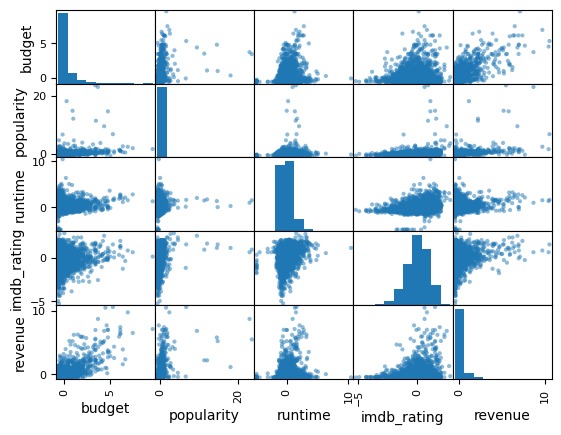

In [107]:
pd.plotting.scatter_matrix(mov_train[['budget','popularity','runtime','imdb_rating','revenue']])

In [108]:
import seaborn as sns

<AxesSubplot: >

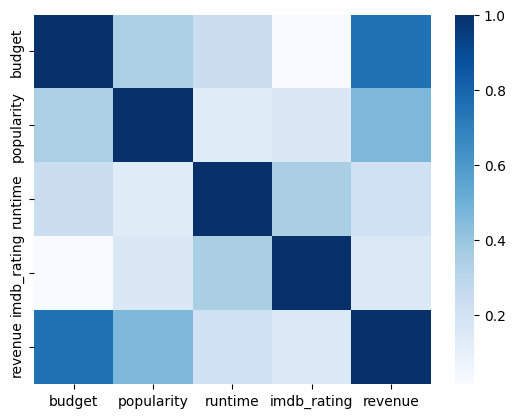

In [111]:
sns.heatmap(mov_train[['budget','popularity','runtime','imdb_rating','revenue']].corr(),cmap='Blues')

In [113]:
mov_train.cast[5]

"[{'cast_id': 6, 'character': 'Pinocchio (voice)', 'credit_id': '52fe46f49251416c9106558f', 'gender': 2, 'id': 35091, 'name': 'Scott Grimes', 'order': 0, 'profile_path': '/tm8uz3DbD0hlXRciYgCuaHrXepl.jpg'}, {'cast_id': 7, 'character': 'Geppetto (voice)', 'credit_id': '52fe46f49251416c91065593', 'gender': 2, 'id': 41217, 'name': 'Tom Bosley', 'order': 1, 'profile_path': '/9S95lnM10Qa3PGY86o7dvSFg0VL.jpg'}, {'cast_id': 8, 'character': 'Fairy Godmother (voice)', 'credit_id': '52fe46f49251416c91065597', 'gender': 0, 'id': 56540, 'name': 'Rickie Lee Jones', 'order': 2, 'profile_path': None}, {'cast_id': 9, 'character': 'Emperor of the Night (voice)', 'credit_id': '52fe46f49251416c9106559b', 'gender': 0, 'id': 15152, 'name': 'James Earl Jones', 'order': 3, 'profile_path': '/2ZuBf3ip2RXhkiQqGUjbUzAf4Nx.jpg'}]"

In [166]:
actors=set()
for item in mov_train.cast:
    if(type(item)==str):
        x=re.finditer("(\'name\':\s\')(?P<name>[\w\.\s]*)(?=\')",item)
        for s in x:
            actors.add(s.groupdict()['name'])
print(actors)

{'Henry Frost', 'Zabou Breitman', 'Tom Roach', 'Quinn Maixner', 'Vasilisa Kucherenko', 'Mike Wilmot', 'Maung Maung Khin', 'Edward Andrews', 'Phillippe Boekstal', 'Jon Lovitz', 'Josette DiCarlo', 'Vernon Rieta', 'David Thewlis', 'John Moreno', 'Guinn Williams', 'Holly Hougham', 'King Donovan', 'Isabel Dean', 'Michael Palin', 'Millie Wannamaker', 'Brye Cooper', 'Cicely Tyson', 'Kate Moss', 'Devon Brookshire', 'John Cunningham', 'Jonny Beauchamp', 'Aleksandr Tyutin', 'Greg Finley', 'Emily Berry', 'Brock Peters', 'Monique Gabriela Curnen', 'Graham McTavish', 'Monika Dumon', 'Robert Prosky', 'Elias Koteas', 'Gerald McRaney', 'Belinda', 'Tom Yi', 'John Kraaykamp', 'Matt Gerald', 'Jessica Biel', 'Spike Lee', 'Hunter Hamilton', 'James Watlington', 'Max Ligosh', 'Andrew Scott', 'Laura Jeanes', 'Francisco Alfonsin', 'Sam Bottoms', 'Ann Reinking', 'Amelia Donkor', 'James Wills', 'Gloria Gifford', 'Paul Stevens', 'Ian Eastwood', 'Archie Lal', 'Raymond Newholy', 'Jennifer Ehle', 'Morgan Walters', '

In [167]:
len(actors)

35994

In [192]:
pop_by_name=pd.DataFrame(columns=['MoviesN','AvgPop','AvgIMDB'],index=actors)
pop_by_name['MoviesN']=0
for j in mov_train.index:
    cast=mov_train.cast[j]
    if(type(cast)==str):
        x=re.findall("(\'name\':\s\')(?P<name>[\w\s\.]*)(?=\')",cast)
        for elem in x:
            count=pop_by_name.loc[elem[1],'MoviesN']
            if not count==0:
                if not math.isnan(mov_train.popularity[j]) and not math.isnan(mov_train.imdb_rating[j]):
                    pop_by_name.loc[elem[1],'MoviesN']=count+1
                    pop_by_name.loc[elem[1],'AvgPop']=(pop_by_name.loc[elem[1],'AvgPop']*count+mov_train.popularity[j])/(count+1)
                    pop_by_name.loc[elem[1],'AvgIMDB']=(pop_by_name.loc[elem[1],'AvgIMDB']*count+mov_train.imdb_rating[j])/(count+1)
            else:
                if not math.isnan(mov_train.popularity[j]) and not math.isnan(mov_train.imdb_rating[j]):
                    pop_by_name.loc[elem[1],'MoviesN']=1
                    pop_by_name.loc[elem[1],'AvgPop']=mov_train.popularity[j]
                    pop_by_name.loc[elem[1],'AvgIMDB']=mov_train.imdb_rating[j]

In [207]:
from sklearn.preprocessing import MinMaxScaler
scaler2=MinMaxScaler()
scaler2.fit(pop_by_name[['AvgPop','AvgIMDB']])
pop_by_name[['AvgPop','AvgIMDB']]=scaler2.transform(pop_by_name[['AvgPop','AvgIMDB']])
good_actors=pop_by_name[pop_by_name['MoviesN']>=2].sort_values(by=['MoviesN','AvgPop','AvgIMDB'],ascending=False)

In [208]:
good_actors['Score']=0

In [218]:
for actor in good_actors.index:
    good_actors.loc[actor,'Score']=1/(1+math.exp(-good_actors.loc[actor,'MoviesN']+3))*(0.3*good_actors.loc[actor,'AvgPop']+0.7*good_actors.loc[actor,'AvgIMDB'])

In [244]:
good_actors=good_actors[good_actors['Score']>0.43].sort_values(by=['Score'],ascending=False)

In [245]:
for actor in good_actors.index:
    print(good_actors.loc[actor])

MoviesN    8.000000
AvgPop     0.257924
AvgIMDB    0.762346
Score      0.606930
Name: Stan Lee, dtype: float64
MoviesN    6.000000
AvgPop     0.027834
AvgIMDB    0.849794
Score      0.574599
Name: Gino Corrado, dtype: float64
MoviesN    5.000000
AvgPop     0.163211
AvgIMDB    0.861728
Score      0.574432
Name: Joseph Oliveira, dtype: float64
MoviesN    10.000000
AvgPop      0.117575
AvgIMDB     0.766667
Score       0.571418
Name: Andy Serkis, dtype: float64
MoviesN    15.000000
AvgPop      0.053379
AvgIMDB     0.772840
Score       0.556998
Name: Philip Ettington, dtype: float64
MoviesN    9.000000
AvgPop     0.059086
AvgIMDB    0.772291
Score      0.556949
Name: Ian Holm, dtype: float64
MoviesN    9.000000
AvgPop     0.027335
AvgIMDB    0.777778
Score      0.551278
Name: Bess Flowers, dtype: float64
MoviesN    6.000000
AvgPop     0.063928
AvgIMDB    0.792181
Score      0.546497
Name: Jed Brophy, dtype: float64
MoviesN    13.000000
AvgPop      0.048547
AvgIMDB     0.754986
Score       0

MoviesN    8.000000
AvgPop     0.021634
AvgIMDB    0.623457
Score      0.439946
Name: Nora Dunn, dtype: float64
MoviesN    9.000000
AvgPop     0.032824
AvgIMDB    0.615912
Score      0.439895
Name: Eddie Izzard, dtype: float64
MoviesN    6.000000
AvgPop     0.026471
AvgIMDB    0.648148
Score      0.439751
Name: Jonathan Banks, dtype: float64
MoviesN    5.000000
AvgPop     0.039312
AvgIMDB    0.696296
Score      0.439695
Name: Glen Powell, dtype: float64
MoviesN    5.000000
AvgPop     0.027358
AvgIMDB    0.701235
Score      0.439581
Name: George Segal, dtype: float64
MoviesN    6.000000
AvgPop     0.021009
AvgIMDB    0.650206
Score      0.439562
Name: Charles Bronson, dtype: float64
MoviesN    8.000000
AvgPop     0.038240
AvgIMDB    0.615741
Score      0.439529
Name: Josh Peck, dtype: float64
MoviesN    5.000000
AvgPop     0.038513
AvgIMDB    0.696296
Score      0.439484
Name: Matthias Schoenaerts, dtype: float64
MoviesN    6.000000
AvgPop     0.025372
AvgIMDB    0.648148
Score      0.4

In [248]:
good_actors.loc['Robert Downey Jr.']

MoviesN    18.000000
AvgPop      0.055232
AvgIMDB     0.671468
Score       0.486597
Name: Robert Downey Jr., dtype: float64

In [247]:
with open('good_actors.csv','w') as file:
    good_actors.to_csv(file)